In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100
)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

In [3]:
import matplotlib.pyplot as plt


def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

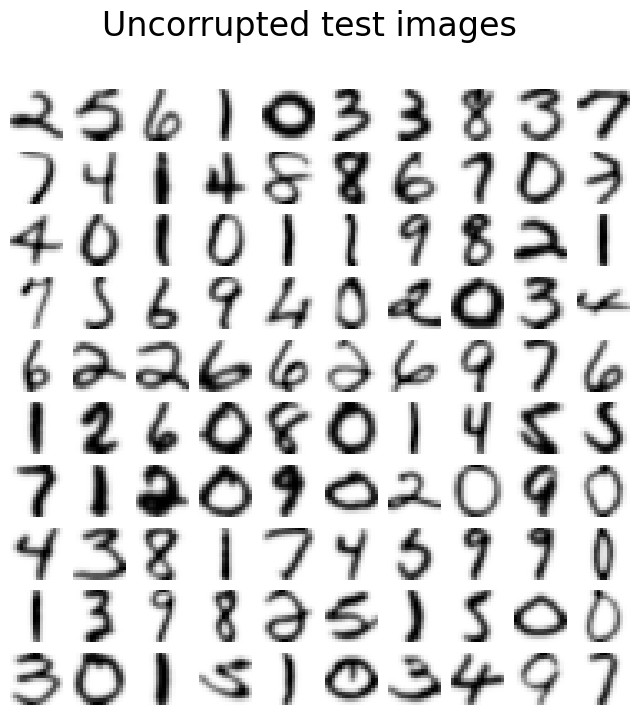

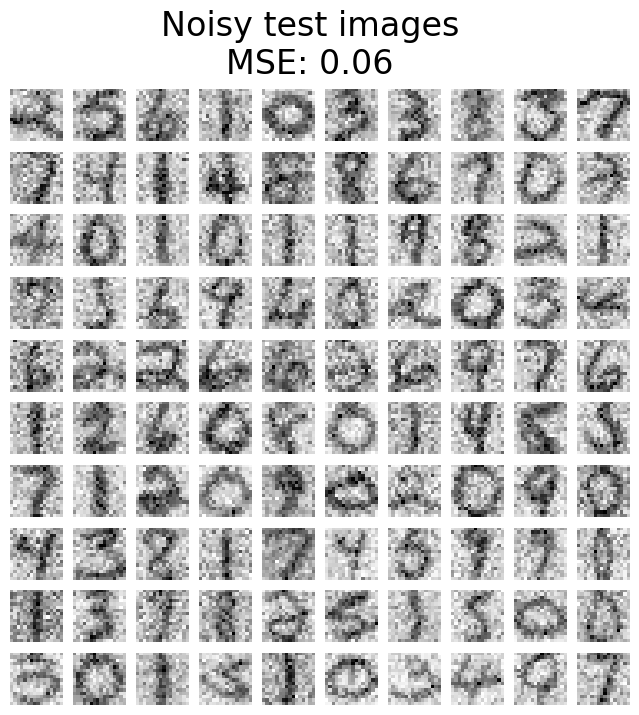

In [4]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

In [5]:
from sklearn.decomposition import PCA, KernelPCA

kernel_pca = KernelPCA(
    n_components=400,
    kernel="rbf",
    gamma=1e-3,
    fit_inverse_transform=True,
    alpha=5e-3,
    random_state=42,
)

_ = kernel_pca.fit(X_train_noisy)

In [6]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)


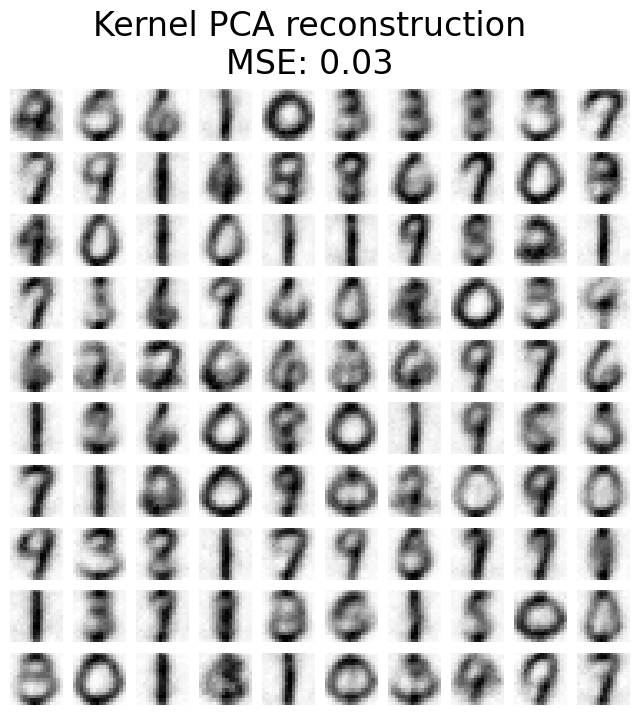

In [7]:
plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)


In [8]:
np.mean((X_test - X_reconstructed_kernel_pca) ** 2)

0.02643588759646761

In [9]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# Define your custom kernel function
def custom_kernel(X, Y):
    # Implement your custom kernel computation here
    # For example, let's use a simple linear kernel as an example
    return np.dot(X, Y.T)

# Generate some sample data
X, _ = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# Initialize KernelPCA with your custom kernel
kpca_custom = KernelPCA(kernel=custom_kernel, n_components=40)

# Fit KernelPCA to the data
kpca_custom.fit(X)

# Obtain the transformed data
X_transformed_custom = kpca_custom.transform(X)

print("Transformed data shape:", X_transformed_custom.shape)


Transformed data shape: (1000, 40)


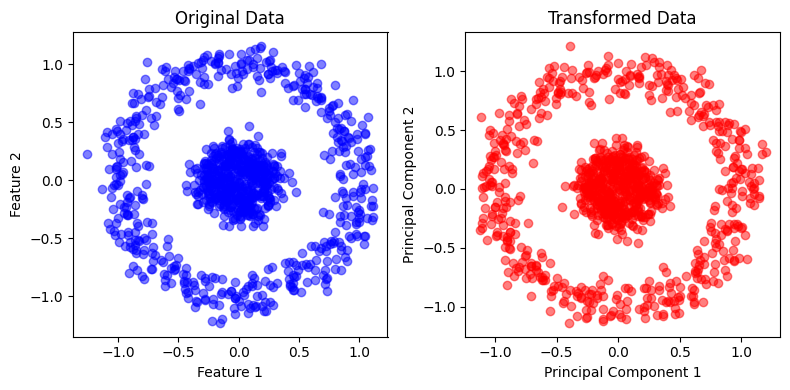

In [10]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_transformed_custom[:, 0], X_transformed_custom[:, 1], c='r', marker='o', alpha=0.5)
plt.title("Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


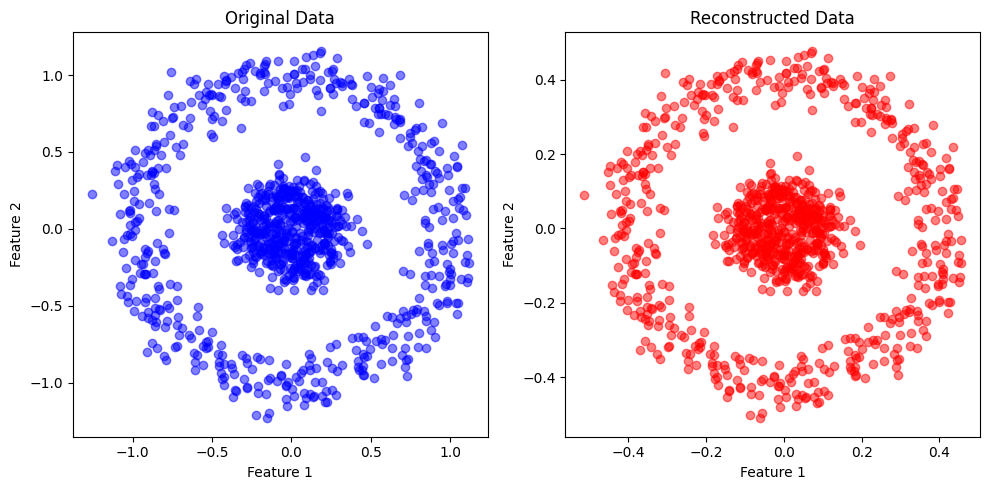

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# Define the given custom kernel function
def custom_kernel(X, Y):
    # Ensure X and Y are reshaped to be 2-dimensional arrays if they are not already
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)

    a = 22.36  # You can adjust this parameter as needed
    d = X.shape[1]  # Dimensionality of the input data

    # Initialize kernel matrix
    K = np.zeros((X.shape[0], Y.shape[0]))

    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            # Compute the product term
            product_term = 1
            for k in range(d):
                product_term *= np.cos(5 * (x[k] - y[k]) / a) * np.exp(-((x[k] - y[k]) ** 2) / (2 * a ** 2))
            
            # Update the kernel matrix with the product term
            K[i, j] = product_term

    return K

# Generate some sample data
X, _ = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# Initialize KernelPCA with the custom kernel
kpca_custom = KernelPCA(kernel=custom_kernel, fit_inverse_transform= True, n_components=40)

# Fit KernelPCA to the data
X_transformed_custom = kpca_custom.fit_transform(X)

# Reconstruct the original data
X_reconstructed_custom = kpca_custom.inverse_transform(X_transformed_custom)

# Plot the original and reconstructed data
plt.figure(figsize=(10, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', alpha=0.5, label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reconstructed data
plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed_custom[:, 0], X_reconstructed_custom[:, 1], c='r', alpha=0.5, label='Reconstructed Data')
plt.title('Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [12]:
kernel_pca = KernelPCA(
kernel=custom_kernel, fit_inverse_transform= True, n_components=400,
    random_state=42
)

_ = kernel_pca.fit(X_train_noisy)

WAVELET PCA


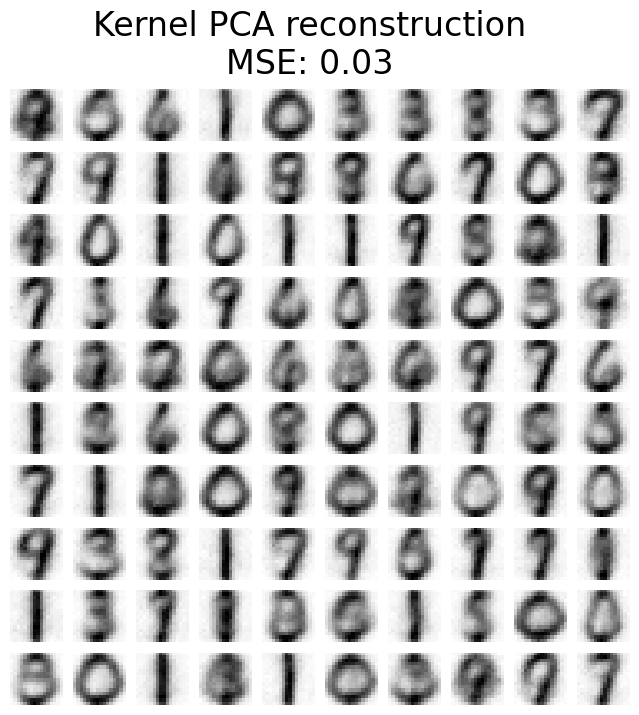

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA


def custom_kernel(X, Y):
    # Ensure X and Y are reshaped to be 2-dimensional arrays if they are not already
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)

    a = 22.36  # You can adjust this parameter as needed
    d = X.shape[1]  # Dimensionality of the input data

    # Initialize kernel matrix
    K = np.zeros((X.shape[0], Y.shape[0]))

    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            # Compute the product term
            product_term = 1
            for k in range(d):
                product_term *= np.cos(5 * (x[k] - y[k]) / a) * np.exp(-((x[k] - y[k]) ** 2) / (2 * a ** 2))
            
            # Update the kernel matrix with the product term
            K[i, j] = product_term

    return K

kernel_pca = KernelPCA(
kernel=custom_kernel, fit_inverse_transform= True, n_components=400,
    random_state=42
)

_ = kernel_pca.fit(X_train_noisy)

X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)


In [14]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)

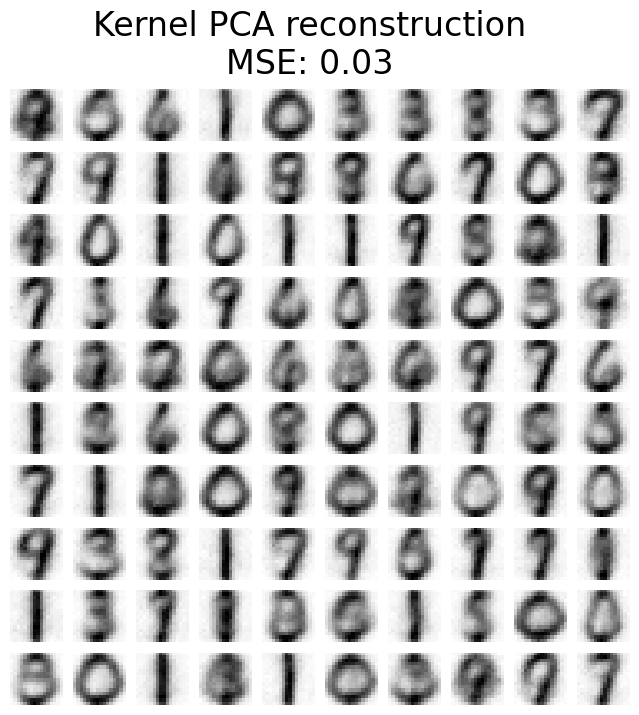

In [15]:
plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)


In [16]:
np.mean((X_test - X_reconstructed_kernel_pca) ** 2)

0.03285978107359473